In [1]:
# Constants
TRAIN_FRACTION = 0.8
RANDOM_SEED = 86720

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [3]:
df = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
train_data = df.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)

In [7]:
train_index = list(train_data.index)

In [8]:
test_data = df.drop(train_index)

In [9]:
test_index = list(test_data.index)

In [10]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [11]:
x_test = test_data[features]

In [12]:
y_test = test_data['Outcome']

In [13]:
x_train = train_data[features]
y_train = train_data['Outcome']

In [14]:
print(f"Number of diabetic patients in training - {sum(y_train)}")
print(f"Number of non-diabetic patients in training - {sum(1-(y_train))}")

Number of diabetic patients in training - 226
Number of non-diabetic patients in training - 388


In [15]:
print(f"Number of diabetic patients in test - {sum(y_test)}")
print(f"Number of non-diabetic patients in test - {sum(1-(y_test))}")

Number of diabetic patients in test - 42
Number of non-diabetic patients in test - 112


In [16]:
x_test.shape

(154, 8)

In [17]:
max_depth_tree = 1

#### Entropy Metric - Best Split

In [18]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=max_depth_tree)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

[Text(0.5, 0.75, 'Glucose <= 123.5\nentropy = 0.949\nsamples = 614\nvalue = [388, 226]'),
 Text(0.25, 0.25, 'entropy = 0.705\nsamples = 355\nvalue = [287, 68]'),
 Text(0.75, 0.25, 'entropy = 0.965\nsamples = 259\nvalue = [101, 158]')]

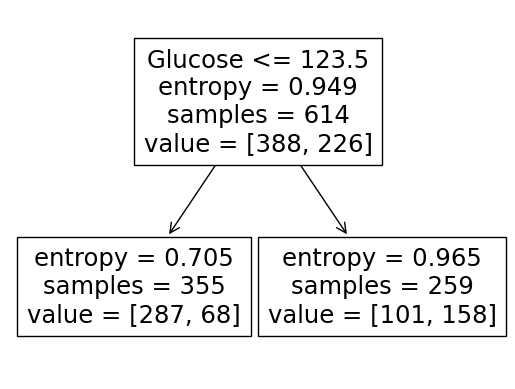

In [19]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 72.47557003257329
Recall Score: 69.91150442477876
Precision score: 61.003861003861005


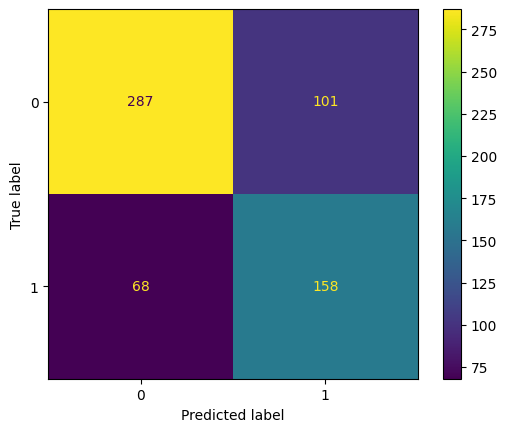

In [20]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 70.77922077922078
Recall Score: 71.42857142857143
Precision score: 47.61904761904761


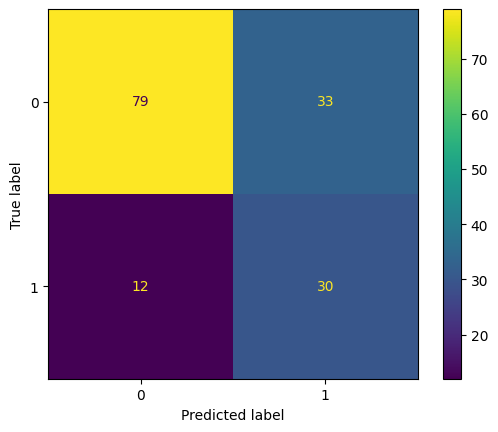

In [21]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

In [22]:
records=[]
for depth in range(1,20):
    dtree = DecisionTreeClassifier(criterion="entropy",max_depth=depth)
    dtree.fit(x_train,y_train)
    y_pred = dtree.predict(x_test)

    Accuracy= 100*metrics.accuracy_score(y_test,y_pred)
    Recall=100*metrics.recall_score(y_test,y_pred)
    Precision= 100*metrics.precision_score(y_test,y_pred)
    FPR = 100*(1-metrics.recall_score(y_test,y_pred,pos_label=0))
    records.append([depth,Accuracy,Recall,Precision,FPR])
df=pd.DataFrame.from_records(records,columns=['Depth','Accuracy','Recall','Precision','FPR'])

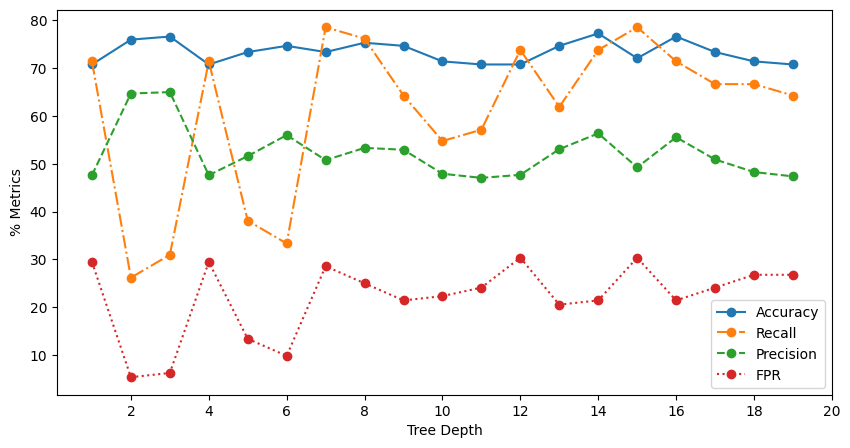

In [23]:
plt.figure(figsize=[10,5])
plt.plot(df['Depth'],df['Accuracy'],'-o')
plt.plot(df['Depth'],df['Recall'],'-.o')
plt.plot(df['Depth'],df['Precision'],'--o')
plt.plot(df['Depth'],df['FPR'],':o')
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.xlabel('Tree Depth')
plt.ylabel('% Metrics')
plt.legend(['Accuracy','Recall','Precision','FPR'])
plt.show()
plt.close()

#### Gini Metric - Best Split

In [24]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=max_depth_tree)
dtree.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'Glucose <= 127.5\ngini = 0.465\nsamples = 614\nvalue = [388, 226]'),
 Text(0.25, 0.25, 'gini = 0.329\nsamples = 385\nvalue = [305, 80]'),
 Text(0.75, 0.25, 'gini = 0.462\nsamples = 229\nvalue = [83, 146]')]

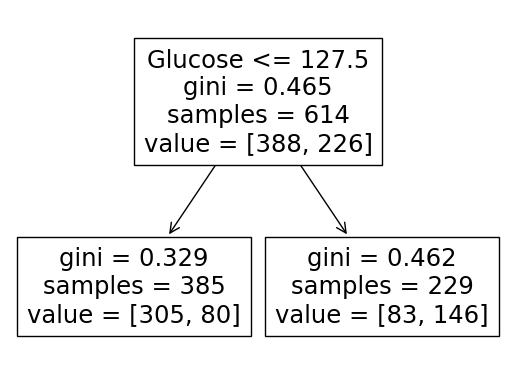

In [25]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 73.45276872964169
Recall Score: 64.60176991150442
Precision score: 63.75545851528385


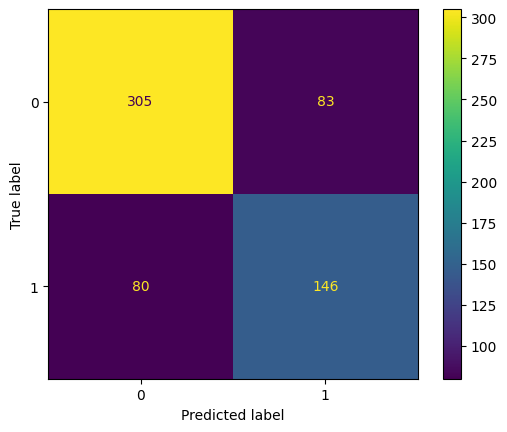

In [26]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 74.02597402597402
Recall Score: 66.66666666666666
Precision score: 51.85185185185185


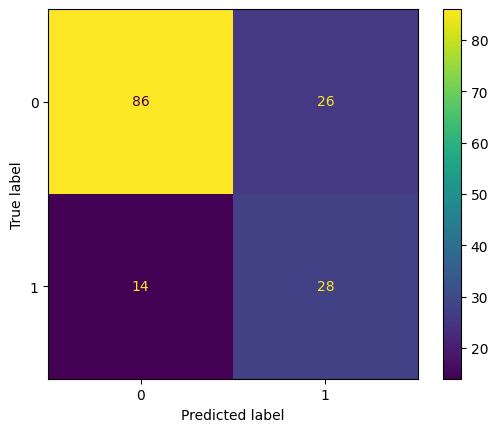

In [27]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

#### Entropy Metric - Random Split

In [28]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=max_depth_tree,splitter="random")
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, splitter='random')

[Text(0.5, 0.75, 'Age <= 26.434\nentropy = 0.949\nsamples = 614\nvalue = [388, 226]'),
 Text(0.25, 0.25, 'entropy = 0.7\nsamples = 243\nvalue = [197, 46]'),
 Text(0.75, 0.25, 'entropy = 0.999\nsamples = 371\nvalue = [191, 180]')]

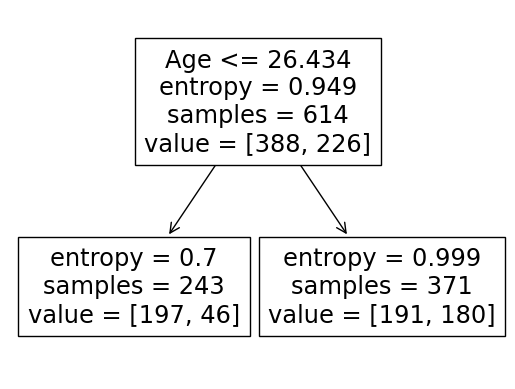

In [29]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 63.19218241042345
Recall Score: 0.0
Precision score: 0.0


C:\Users\GANESH ESWAR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


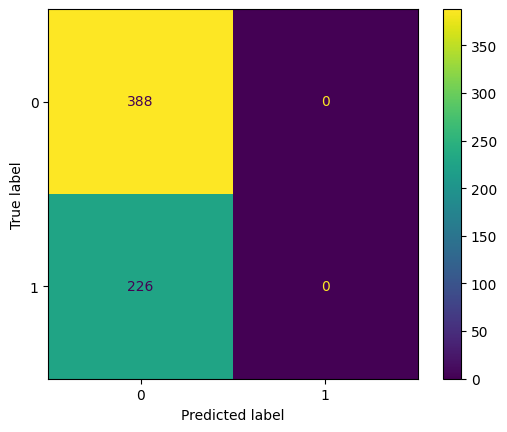

In [30]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 72.72727272727273
Recall Score: 0.0
Precision score: 0.0


C:\Users\GANESH ESWAR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


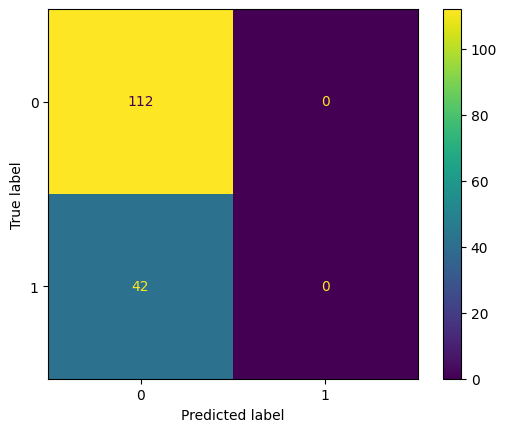

In [31]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

#### Gini Metric - Random Split

In [32]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=max_depth_tree,splitter="random")
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=1, splitter='random')

[Text(0.5, 0.75, 'Glucose <= 101.674\ngini = 0.465\nsamples = 614\nvalue = [388, 226]'),
 Text(0.25, 0.25, 'gini = 0.18\nsamples = 170\nvalue = [153, 17]'),
 Text(0.75, 0.25, 'gini = 0.498\nsamples = 444\nvalue = [235, 209]')]

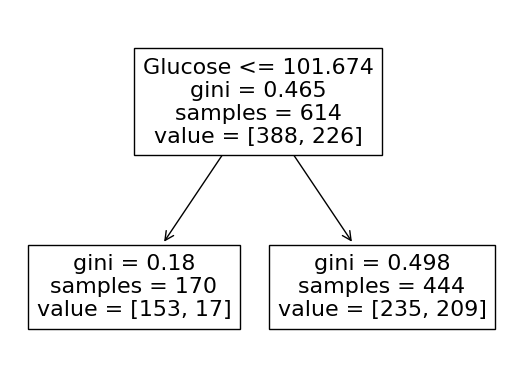

In [33]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 63.19218241042345
Recall Score: 0.0
Precision score: 0.0


C:\Users\GANESH ESWAR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


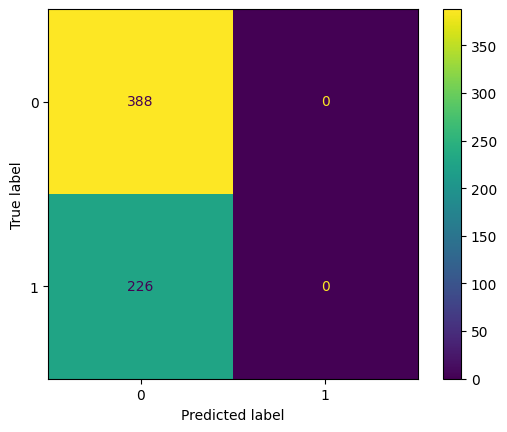

In [34]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 72.72727272727273
Recall Score: 0.0
Precision score: 0.0


C:\Users\GANESH ESWAR\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


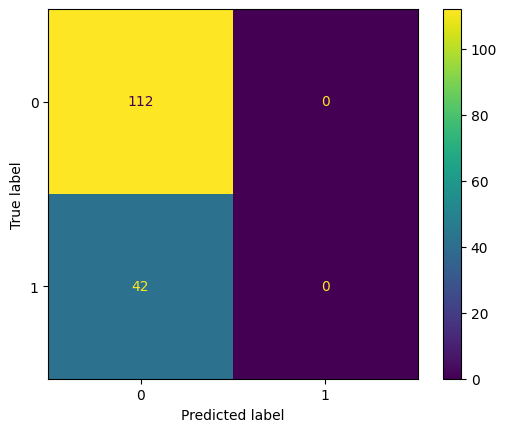

In [35]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

In [36]:
cv1 = train_data.sample(frac=0.2,random_state=1234)

In [37]:
train_data.shape

(614, 9)

In [38]:
cv1.shape

(123, 9)

In [39]:
restcv1 = train_data.drop(list(cv1.index))

In [40]:
restcv1.shape

(491, 9)

In [41]:
cv2 = restcv1.sample(frac=0.25,random_state=1122)
restcv2 = restcv1.drop(list(cv2.index))

In [42]:
restcv2.shape

(368, 9)

In [43]:
cv3 = restcv2.sample(frac=0.334,random_state=122)
restcv3 = restcv2.drop(list(cv3.index))


In [44]:
restcv3.shape

(245, 9)

In [45]:
cv4 = restcv3.sample(frac=0.502,random_state=22)
restcv4 = restcv3.drop(list(cv4.index))


In [46]:
cv5 = restcv4

In [47]:
print(cv1.shape)
print(cv2.shape)
print(cv3.shape)
print(cv4.shape)
print(cv5.shape)

(123, 9)
(123, 9)
(123, 9)
(123, 9)
(122, 9)


In [48]:
# # first crossval leave cv5 for test 
# first_crossval = cv1.concat(cv2.concat(cv3.concat(cv4)))
# # second crossval leave cv4 for test 
# second_crossval = cv1.concat(cv2.concat(cv3.concat(cv5)))
# # third crossval leave cv3 for test 
# third_crossval = cv1.concat(cv2.concat(cv4.concat(cv5)))
# # fourth crossval leave cv2 for test 
# fourth_crossval = cv1.concat(cv3.concat(cv4.concat(cv5)))
# # fifth crossval leave cv1 for test 
# fifth_crossval = cv2.concat(cv3.concat(cv4.concat(cv5)))
first_crossval = pd.concat([cv1, cv2, cv3, cv4])
second_crossval = pd.concat([cv1, cv2, cv3, cv5])
third_crossval = pd.concat([cv1, cv2, cv4, cv5])
fourth_crossval = pd.concat([cv1, cv3, cv4, cv5])
fifth_crossval = pd.concat([cv2, cv3, cv4, cv5])

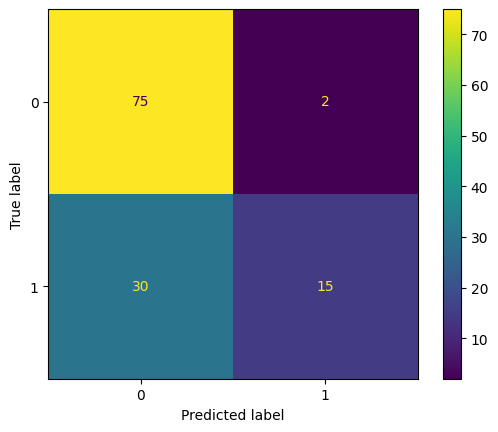

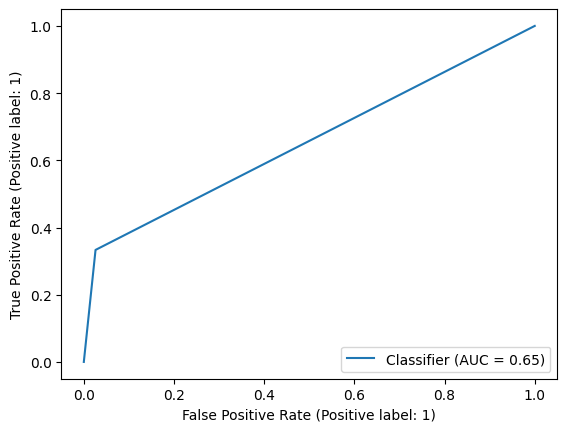

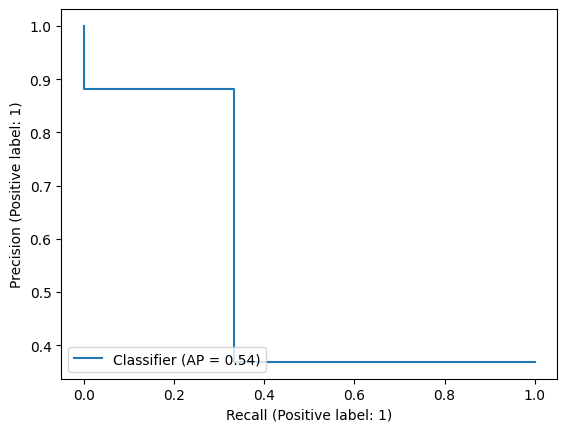

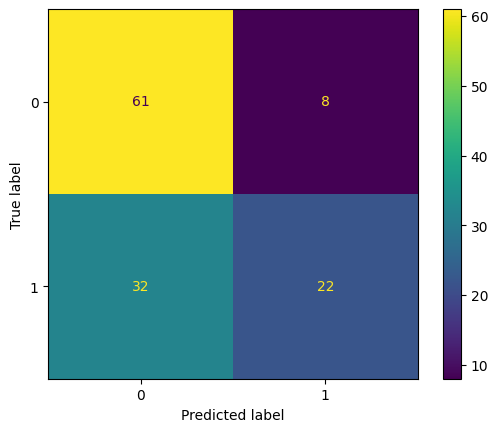

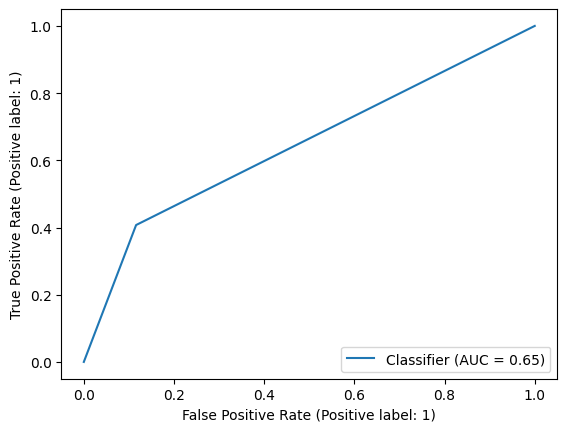

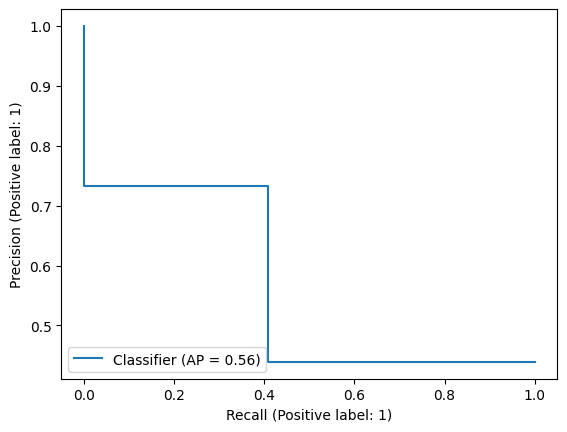

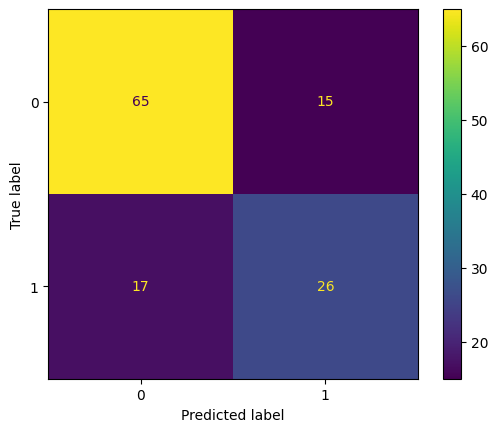

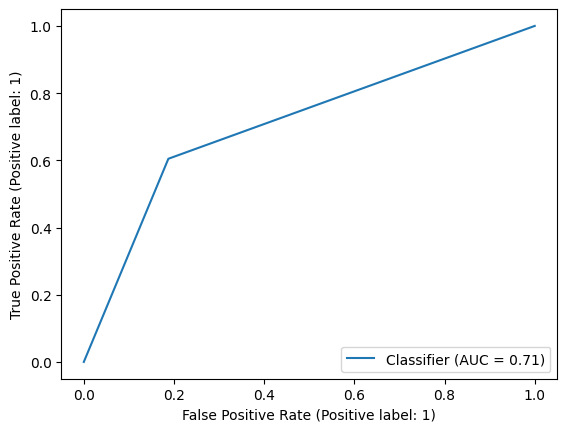

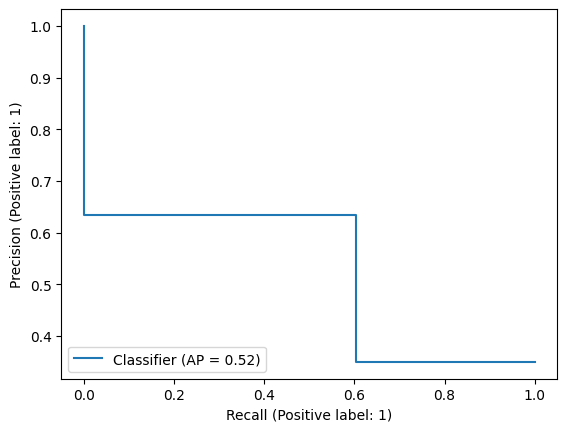

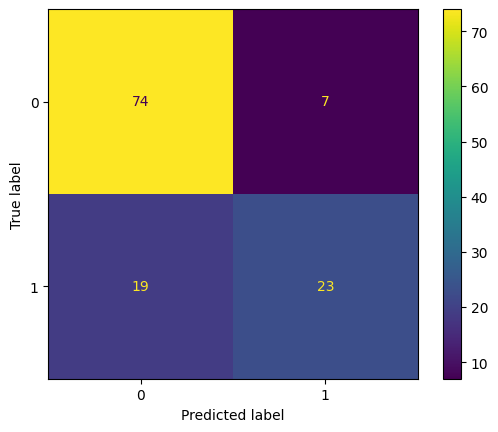

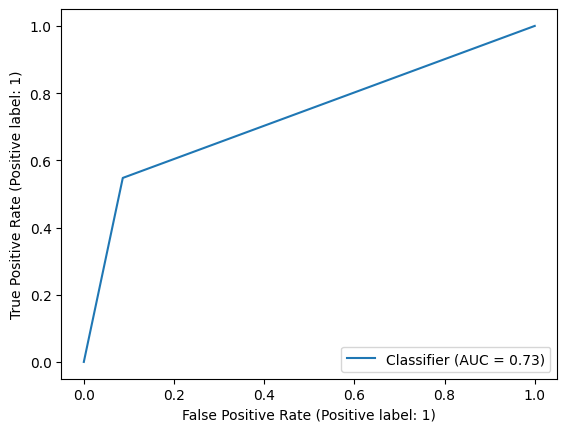

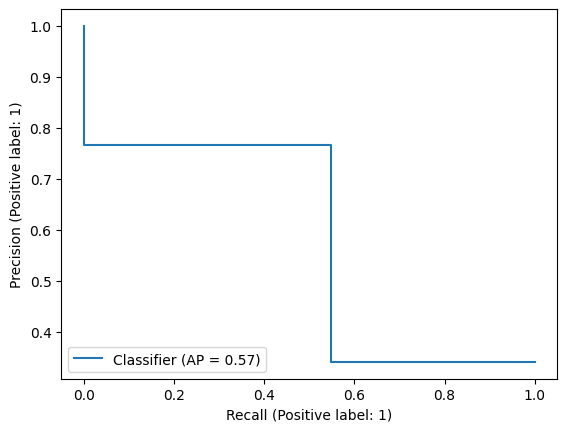

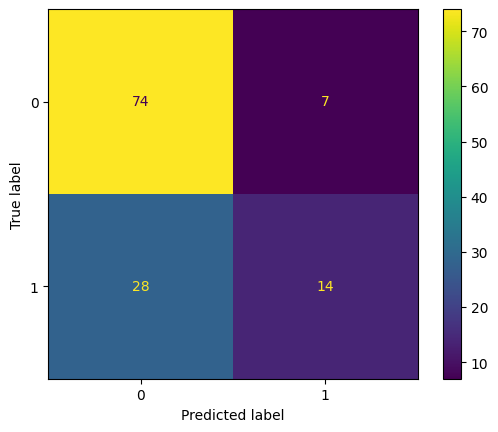

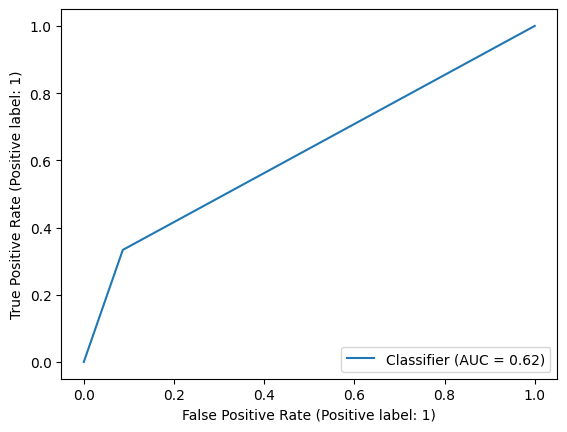

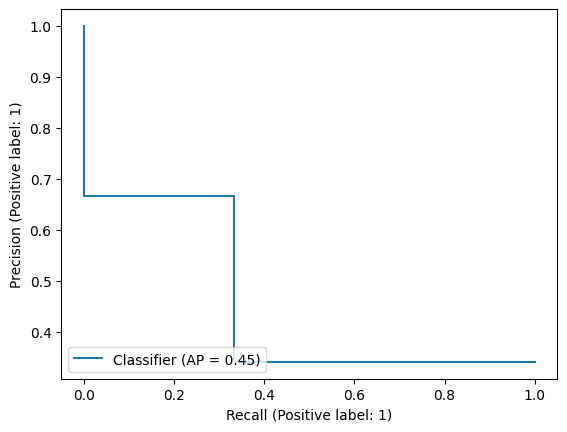

In [49]:
# Depth 2 
cv_accuracy = []
cv_precision = []
cv_recall = []
for datadf in [(first_crossval,cv5),(second_crossval,cv4),(third_crossval,cv3),(fourth_crossval,cv2),(fifth_crossval,cv1)]:
    x_tra,y_tra = datadf[0].iloc[:,:-1],datadf[0].iloc[:,-1]
    x_te,y_te = datadf[1].iloc[:,:-1],datadf[1].iloc[:,-1]
    dtree = DecisionTreeClassifier(criterion="entropy",max_depth=2,splitter="best")
    dtree.fit(x_tra,y_tra)
    y_pred = dtree.predict(x_te)
    metrics.ConfusionMatrixDisplay.from_predictions(y_te,y_pred)
    metrics.RocCurveDisplay.from_predictions(y_te,y_pred)
    metrics.PrecisionRecallDisplay.from_predictions(y_te,y_pred)
    cv_accuracy.append(100*metrics.accuracy_score(y_te,y_pred))
    cv_recall.append(100*metrics.recall_score(y_te,y_pred))
    cv_precision.append(100*metrics.precision_score(y_te,y_pred))
    

In [50]:
print(cv_accuracy)
print(cv_recall)
print(cv_precision)

[73.77049180327869, 67.47967479674797, 73.98373983739837, 78.86178861788618, 71.54471544715447]
[33.33333333333333, 40.74074074074074, 60.46511627906976, 54.761904761904766, 33.33333333333333]
[88.23529411764706, 73.33333333333333, 63.41463414634146, 76.66666666666667, 66.66666666666666]


In [51]:
print(f"Depth 2 - Avg. Accuracy: {np.mean(cv_accuracy)}")
print(f"Depth 2 - Avg. Recall: {np.mean(cv_recall)}")
print(f"Depth 2 - Avg. Precision: {np.mean(cv_precision)}")
print(f"Depth 2 - Std. Accuracy: {np.std(cv_accuracy)}")
print(f"Depth 2 - Std. Recall: {np.std(cv_recall)}")
print(f"Depth 2 - Std. Precision: {np.std(cv_precision)}")

Depth 2 - Avg. Accuracy: 73.12808210049315
Depth 2 - Avg. Recall: 44.526885689676384
Depth 2 - Avg. Precision: 73.66331898613103
Depth 2 - Std. Accuracy: 3.699507692773752
Depth 2 - Std. Recall: 11.168786254667879
Depth 2 - Std. Precision: 8.6655655519943


<Figure size 640x480 with 0 Axes>

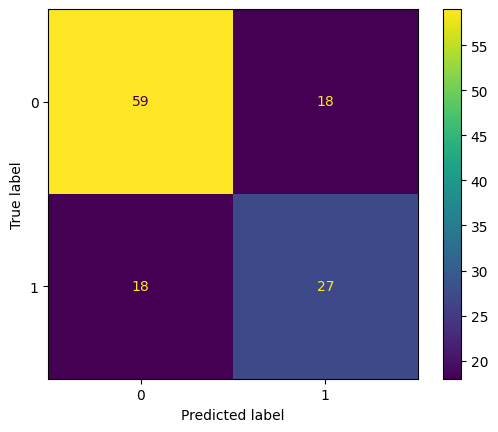

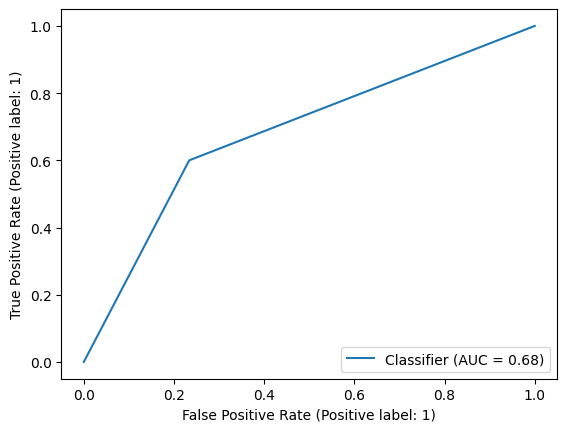

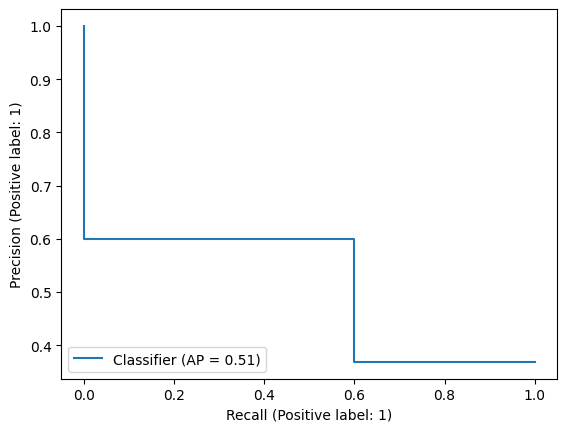

<Figure size 640x480 with 0 Axes>

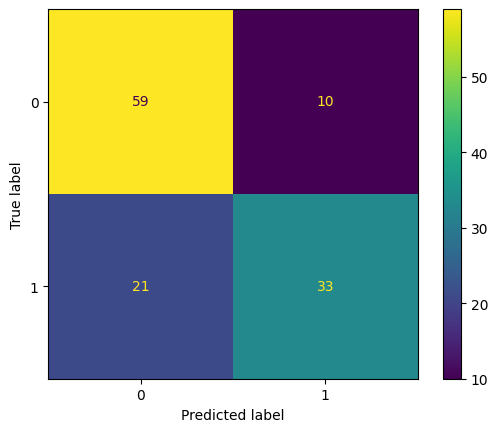

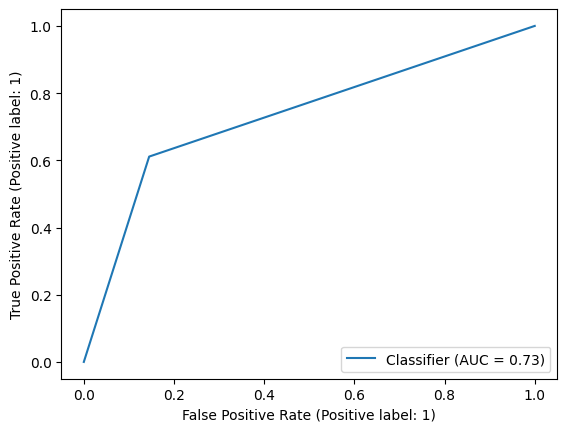

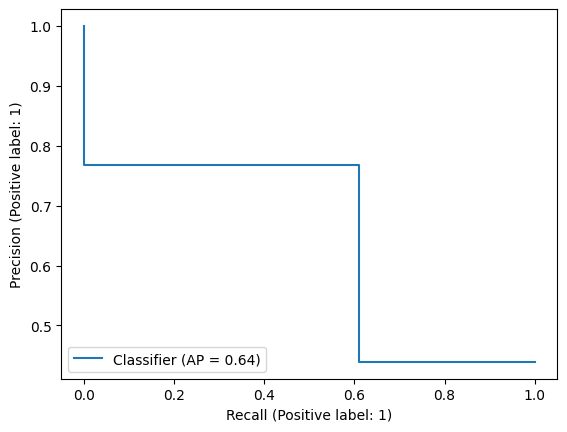

<Figure size 640x480 with 0 Axes>

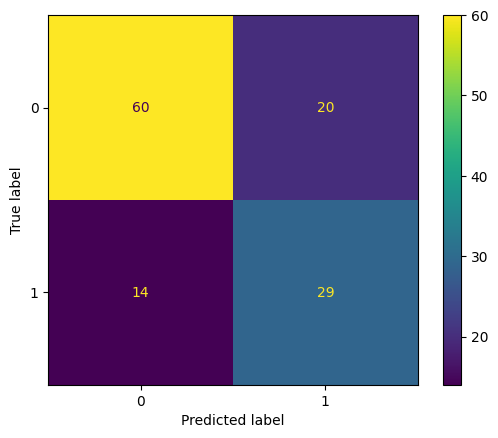

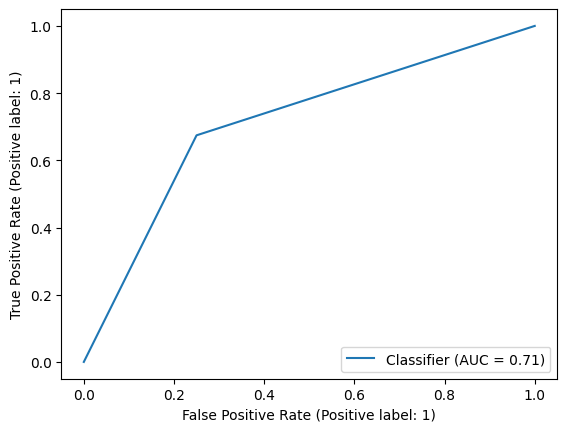

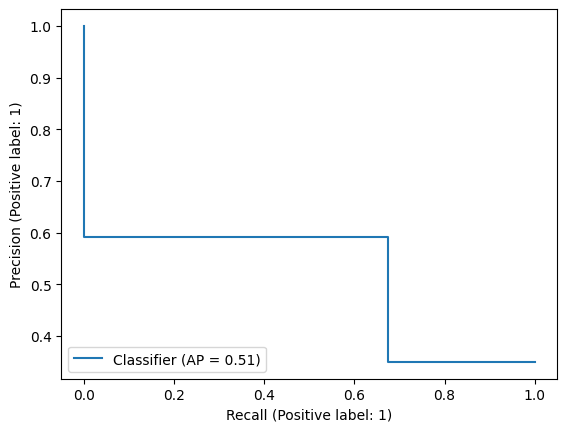

<Figure size 640x480 with 0 Axes>

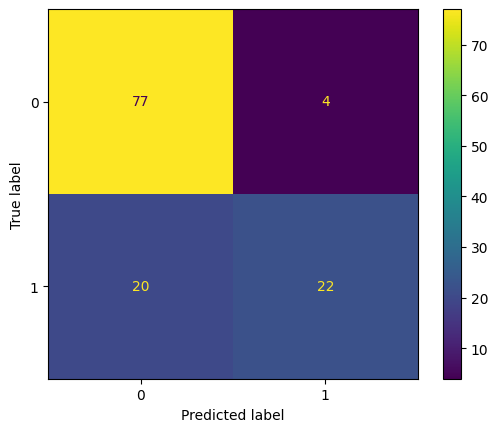

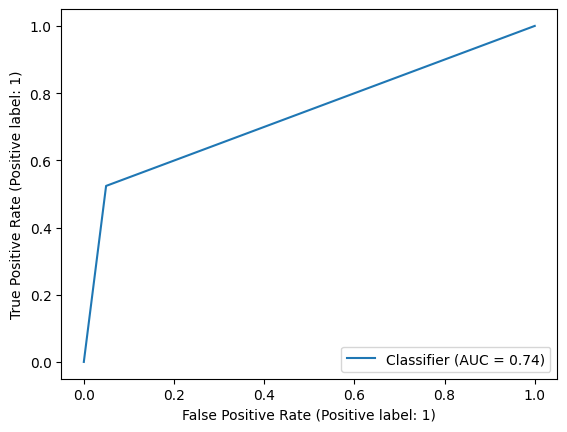

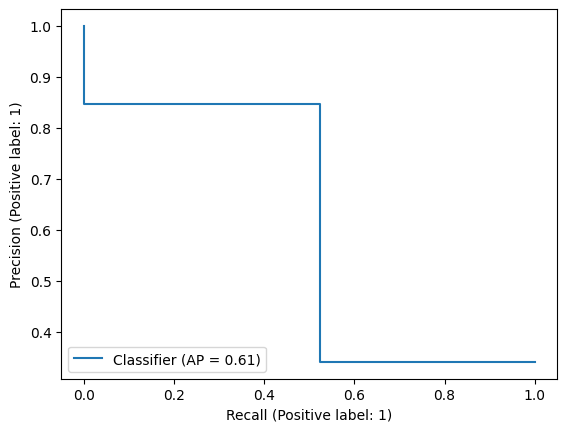

<Figure size 640x480 with 0 Axes>

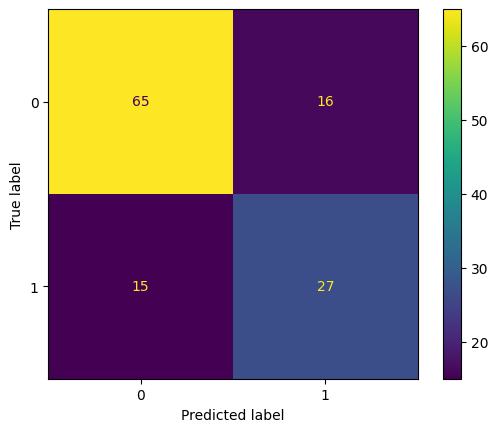

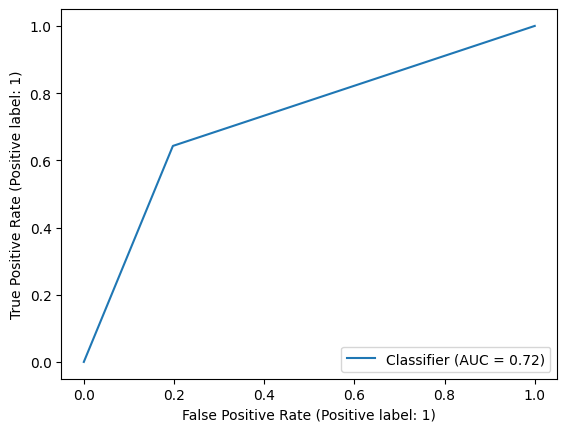

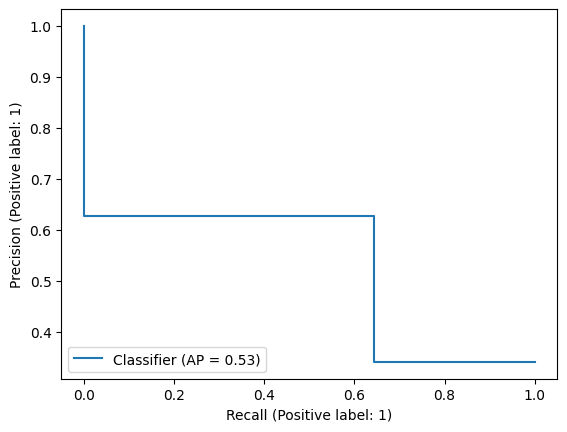

In [52]:
# depth 5
cv_accuracy = []
cv_precision = []
cv_recall = []
for datadf in [(first_crossval,cv5),(second_crossval,cv4),(third_crossval,cv3),(fourth_crossval,cv2),(fifth_crossval,cv1)]:
    x_tra,y_tra = datadf[0].iloc[:,:-1],datadf[0].iloc[:,-1]
    x_te,y_te = datadf[1].iloc[:,:-1],datadf[1].iloc[:,-1]
    dtree = DecisionTreeClassifier(criterion="entropy",max_depth=5,splitter="best")
    dtree.fit(x_tra,y_tra)
    y_pred = dtree.predict(x_te)
    plt.figure(facecolor="white")
    metrics.ConfusionMatrixDisplay.from_predictions(y_te,y_pred)
    metrics.RocCurveDisplay.from_predictions(y_te,y_pred)
    metrics.PrecisionRecallDisplay.from_predictions(y_te,y_pred)
    cv_accuracy.append(100*metrics.accuracy_score(y_te,y_pred))
    cv_recall.append(100*metrics.recall_score(y_te,y_pred))
    cv_precision.append(100*metrics.precision_score(y_te,y_pred))
    

In [53]:
print(f"Depth 5 - Avg. Accuracy: {np.mean(cv_accuracy)}")
print(f"Depth 5 - Avg. Recall: {np.mean(cv_recall)}")
print(f"Depth 5 - Avg. Precision: {np.mean(cv_precision)}")
print(f"Depth 5 - Std. Accuracy: {np.std(cv_accuracy)}")
print(f"Depth 5 - Std. Recall: {np.std(cv_recall)}")
print(f"Depth 5 - Std. Precision: {np.std(cv_precision)}")

Depth 5 - Avg. Accuracy: 74.5861655337865
Depth 5 - Avg. Recall: 61.043927648578816
Depth 5 - Avg. Precision: 68.66678836114053
Depth 5 - Std. Accuracy: 3.3659409591432694
Depth 5 - Std. Recall: 5.051418889109266
Depth 5 - Std. Precision: 10.189928421280408


In [54]:
cv_accuracy = []
cv_precision = []
cv_recall = []
for datadf in [(first_crossval,cv5),(second_crossval,cv4),(third_crossval,cv3),(fourth_crossval,cv2),(fifth_crossval,cv1)]:
    x_tra,y_tra = datadf[0].iloc[:,:-1],datadf[0].iloc[:,-1]
    x_te,y_te = datadf[1].iloc[:,:-1],datadf[1].iloc[:,-1]
    inter_accu = []
    inter_recall = []
    inter_prec = []
    for k in range(1,51,1):
        dtree = DecisionTreeClassifier(criterion="entropy",max_depth=k,splitter="best")
        dtree.fit(x_tra,y_tra)
        y_pred = dtree.predict(x_te)
        # metrics.ConfusionMatrixDisplay.from_predictions(y_te,y_pred)
        # metrics.RocCurveDisplay.from_predictions(y_te,y_pred)
        inter_accu.append(100*metrics.accuracy_score(y_te,y_pred))
        inter_recall.append(100*metrics.recall_score(y_te,y_pred))
        inter_prec.append(100*metrics.precision_score(y_te,y_pred))
    cv_accuracy.append(inter_accu)
    cv_recall.append(inter_recall)
    cv_precision.append(inter_prec)

In [55]:
depth_value = [i for i in range(1,51,1)]

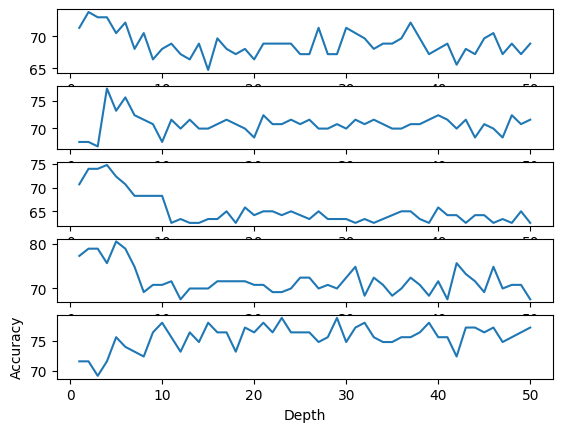

In [56]:
plt.figure(facecolor="white")
plt.subplot(5,1,1)
plt.plot(depth_value,cv_accuracy[0])
plt.subplot(5,1,2)
plt.plot(depth_value,cv_accuracy[1])
plt.subplot(5,1,3)
plt.plot(depth_value,cv_accuracy[2])
plt.subplot(5,1,4)
plt.plot(depth_value,cv_accuracy[3])
plt.subplot(5,1,5)
plt.plot(depth_value,cv_accuracy[4])
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

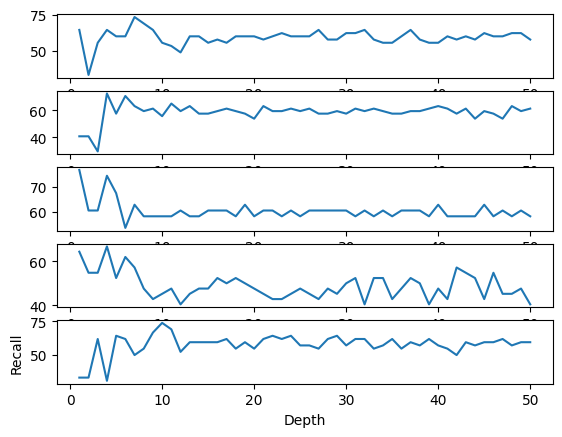

In [57]:
plt.figure(facecolor="white")
plt.subplot(5,1,1)
plt.plot(depth_value,cv_recall[0])
plt.subplot(5,1,2)
plt.plot(depth_value,cv_recall[1])
plt.subplot(5,1,3)
plt.plot(depth_value,cv_recall[2])
plt.subplot(5,1,4)
plt.plot(depth_value,cv_recall[3])
plt.subplot(5,1,5)
plt.plot(depth_value,cv_recall[4])
plt.xlabel("Depth")
plt.ylabel("Recall")
plt.show()

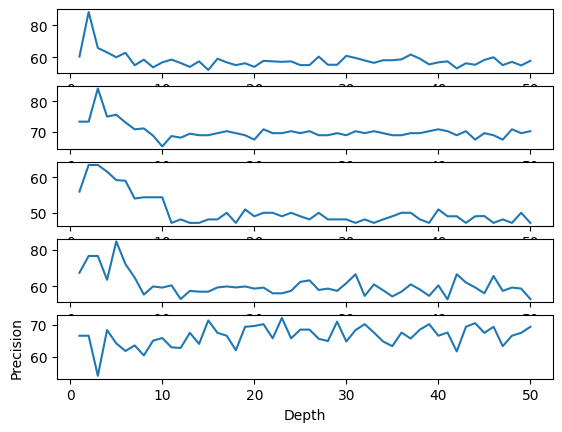

In [58]:
plt.figure(facecolor="white")
plt.subplot(5,1,1)
plt.plot(depth_value,cv_precision[0])
plt.subplot(5,1,2)
plt.plot(depth_value,cv_precision[1])
plt.subplot(5,1,3)
plt.plot(depth_value,cv_precision[2])
plt.subplot(5,1,4)
plt.plot(depth_value,cv_precision[3])
plt.subplot(5,1,5)
plt.plot(depth_value,cv_precision[4])
plt.xlabel("Depth")
plt.ylabel("Precision")
plt.show()

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
clf = RandomForestClassifier(criterion="entropy",max_features=3,random_state=1234)

In [61]:
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_features=3, random_state=1234)

In [62]:
y_pred = clf.predict(x_test)

In [63]:
print(f"Accuracy score: {metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall score: {metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {metrics.precision_score(y_test,y_pred)}")

Accuracy score: 0.7922077922077922
Recall score: 0.7857142857142857
Precision score: 0.5892857142857143


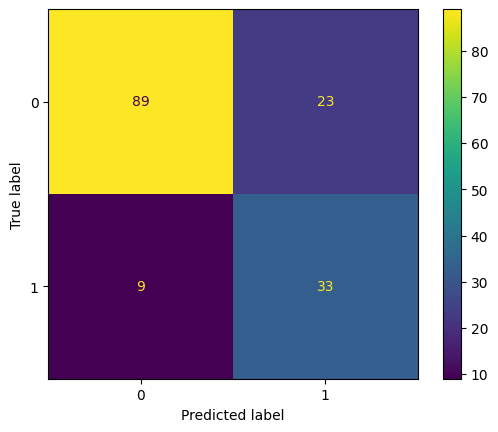

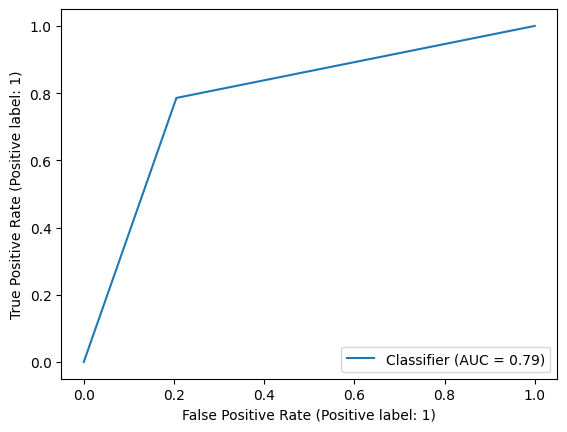

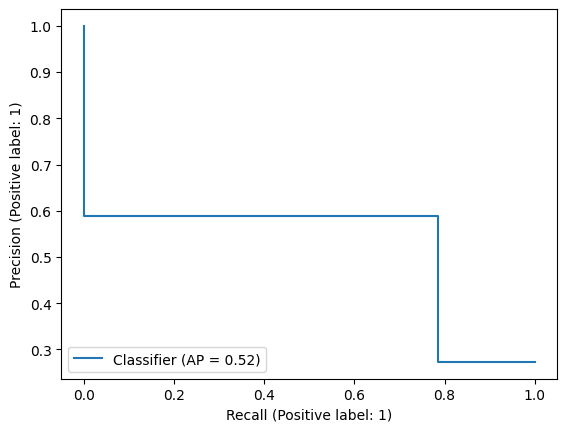

In [64]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
metrics.RocCurveDisplay.from_predictions(y_test,y_pred)
metrics.PrecisionRecallDisplay.from_predictions(y_test,y_pred)

In [65]:
# class weight None
accu = []
recall = []
precision = []
max_feat = []
length = len(x_train.columns)
for feature in range(1,length+1):
    clf = RandomForestClassifier(criterion="entropy",max_features=feature,random_state=1234)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accu.append(metrics.accuracy_score(y_test,y_pred))
    recall.append(metrics.recall_score(y_test,y_pred))
    precision.append(metrics.precision_score(y_test,y_pred))
    max_feat.append(feature)
    

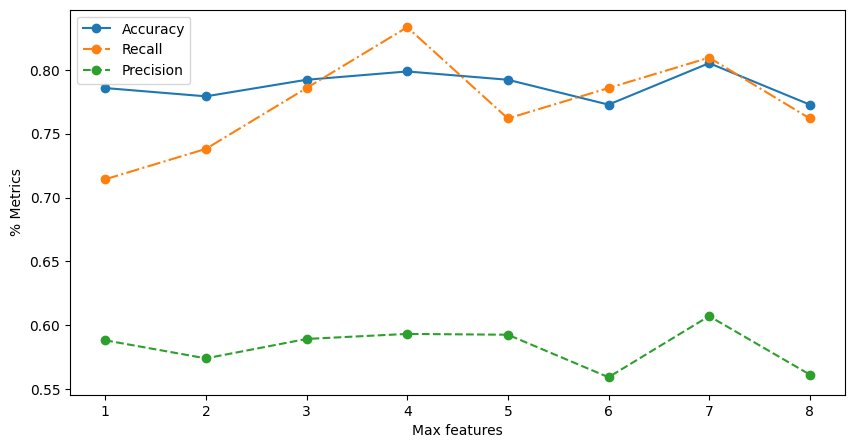

In [66]:
plt.figure(figsize=[10,5])
plt.plot(max_feat,accu,'-o')
plt.plot(max_feat,recall,'-.o')
plt.plot(max_feat,precision,'--o')
plt.xticks(max_feat)
plt.xlabel('Max features')
plt.ylabel('% Metrics')
plt.legend(['Accuracy','Recall','Precision'])
plt.show()
plt.close()

In [67]:
# class weight balanced
accu = []
recall = []
precision = []
max_feat = []
length = len(x_train.columns)
for feature in range(1,length+1):
    clf = RandomForestClassifier(criterion="entropy",max_features=feature,random_state=1234,class_weight="balanced")
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accu.append(metrics.accuracy_score(y_test,y_pred))
    recall.append(metrics.recall_score(y_test,y_pred))
    precision.append(metrics.precision_score(y_test,y_pred))
    max_feat.append(feature)

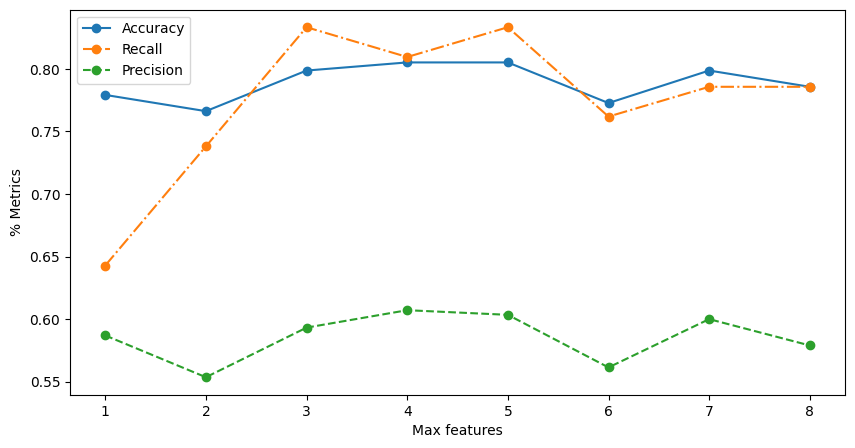

In [68]:
plt.figure(figsize=[10,5])
plt.plot(max_feat,accu,'-o')
plt.plot(max_feat,recall,'-.o')
plt.plot(max_feat,precision,'--o')
plt.xticks(max_feat)
plt.xlabel('Max features')
plt.ylabel('% Metrics')
plt.legend(['Accuracy','Recall','Precision'])
plt.show()
plt.close()

In [69]:
# class weight balanced
accu = []
recall = []
precision = []
n_estimators = []
for n in range(1,2001,100):
    print(n)
    clf = RandomForestClassifier(criterion="entropy",max_features=7,random_state=1234,n_estimators=n)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accu.append(metrics.accuracy_score(y_test,y_pred))
    recall.append(metrics.recall_score(y_test,y_pred))
    precision.append(metrics.precision_score(y_test,y_pred))
    n_estimators.append(n)

1
101
201
301
401
501
601
701
801
901
1001
1101
1201
1301
1401
1501
1601
1701
1801
1901


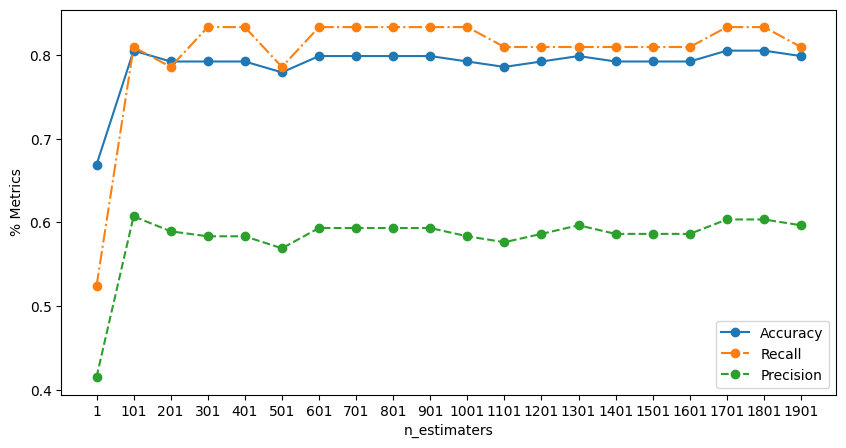

In [70]:
plt.figure(figsize=[10,5])
plt.plot(n_estimators,accu,'-o')
plt.plot(n_estimators,recall,'-.o')
plt.plot(n_estimators,precision,'--o')
plt.xticks(n_estimators)
plt.xlabel('n_estimaters')
plt.ylabel('% Metrics')
plt.legend(['Accuracy','Recall','Precision'])
plt.show()
plt.close()

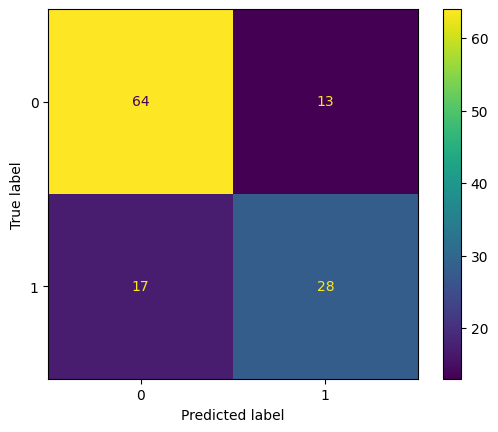

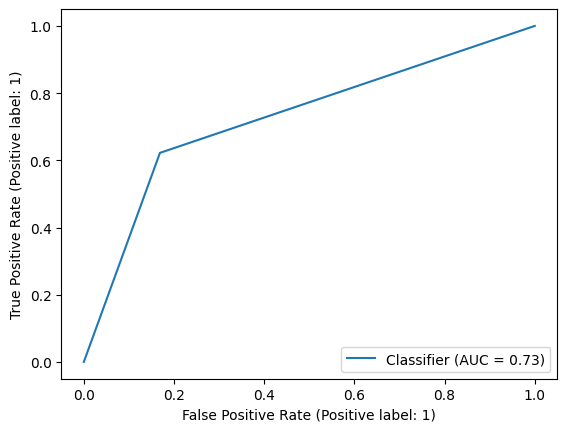

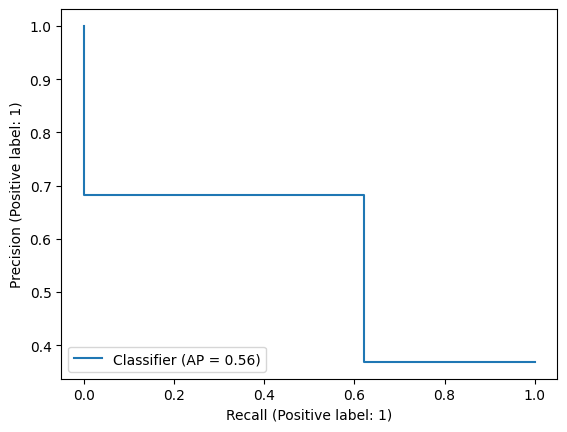

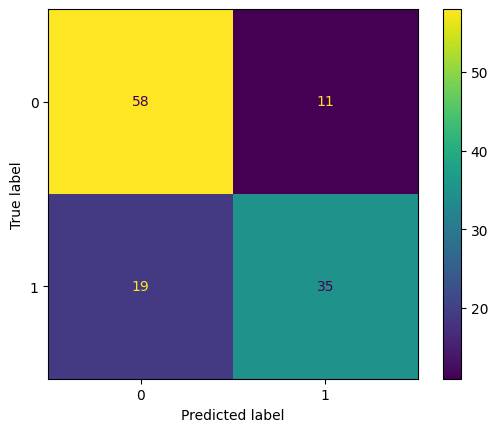

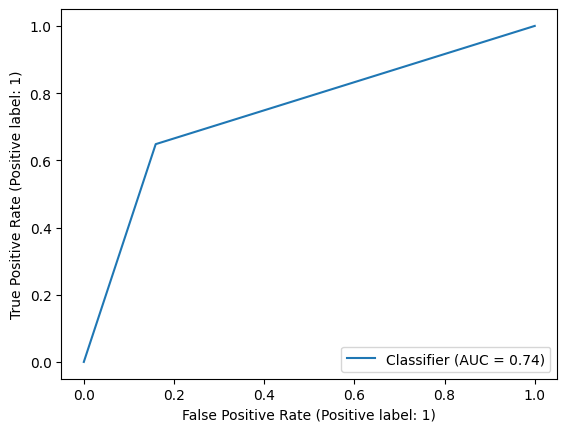

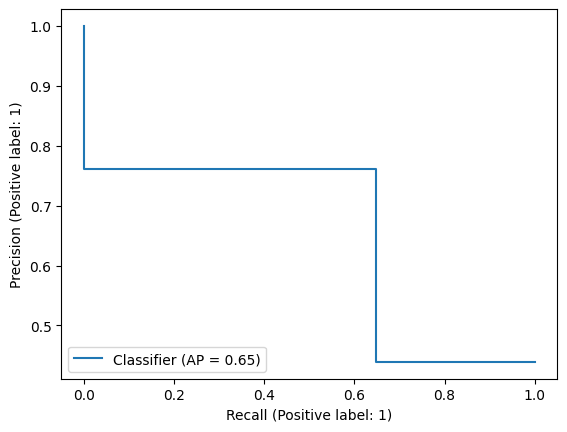

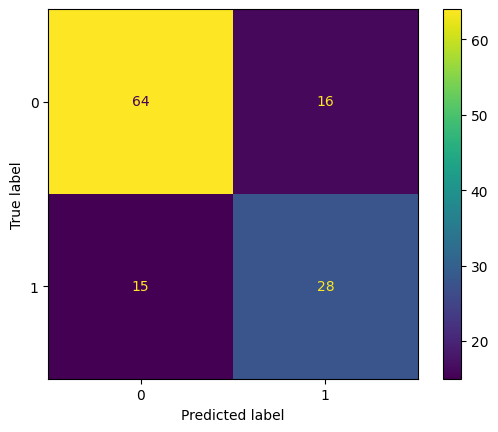

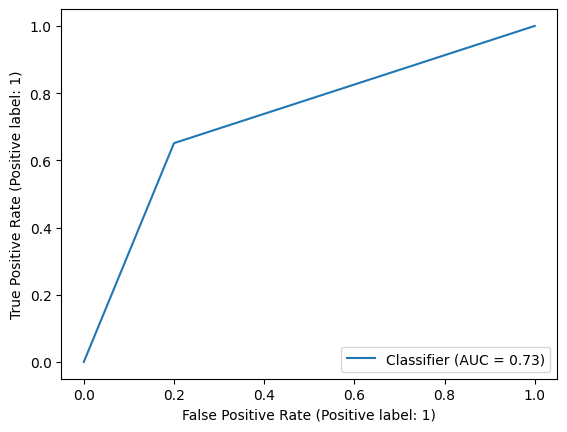

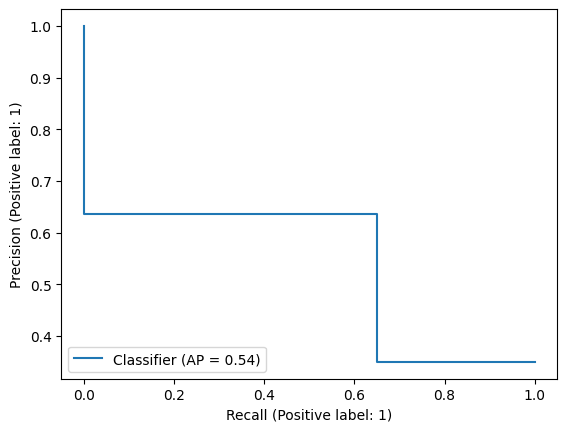

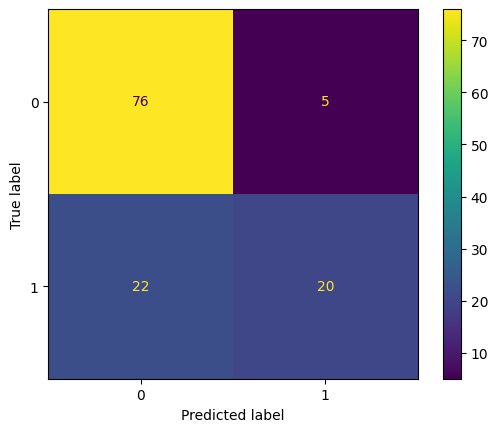

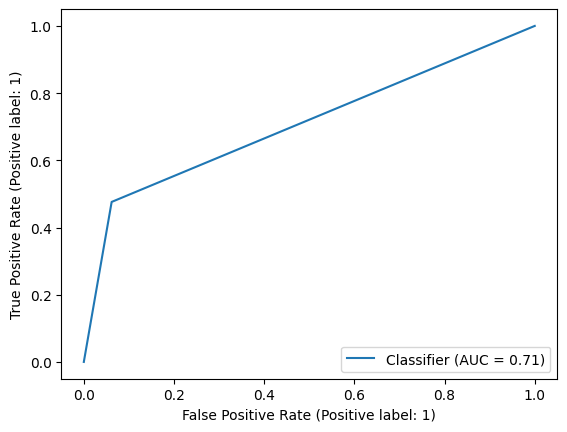

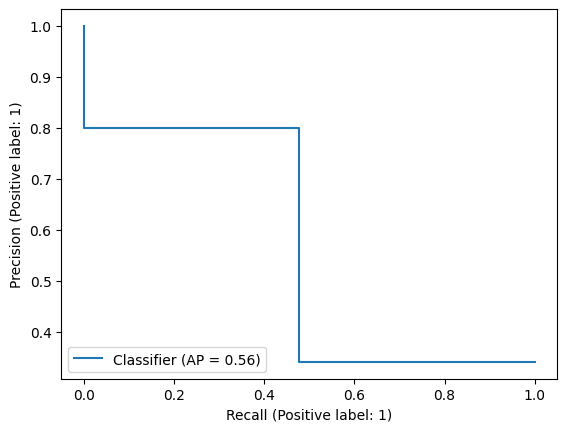

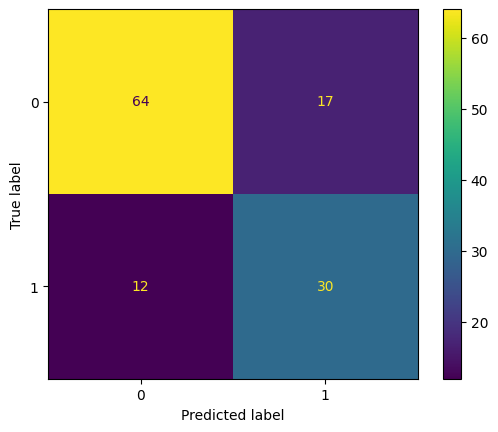

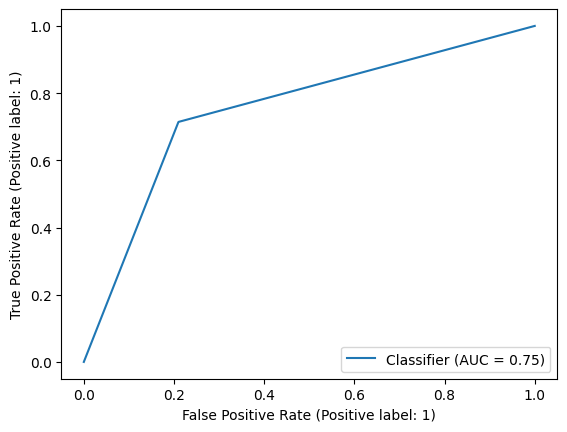

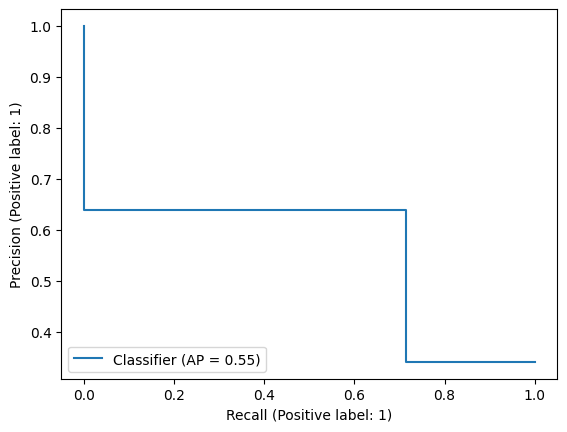

In [71]:
cv_accuracy = []
cv_precision = []
cv_recall = []
for datadf in [(first_crossval,cv5),(second_crossval,cv4),(third_crossval,cv3),(fourth_crossval,cv2),(fifth_crossval,cv1)]:
    x_tra,y_tra = datadf[0].iloc[:,:-1],datadf[0].iloc[:,-1]
    x_te,y_te = datadf[1].iloc[:,:-1],datadf[1].iloc[:,-1]
    rfc = RandomForestClassifier(criterion="entropy",max_features=7,random_state=1234)
    rfc.fit(x_tra,y_tra)
    y_pred = rfc.predict(x_te)
    metrics.ConfusionMatrixDisplay.from_predictions(y_te,y_pred)
    metrics.RocCurveDisplay.from_predictions(y_te,y_pred)
    metrics.PrecisionRecallDisplay.from_predictions(y_te,y_pred)
    cv_accuracy.append(100*metrics.accuracy_score(y_te,y_pred))
    cv_recall.append(100*metrics.recall_score(y_te,y_pred))
    cv_precision.append(100*metrics.precision_score(y_te,y_pred))

In [72]:
print(f"Max features 7 - Avg. Accuracy: {np.mean(cv_accuracy)}")
print(f"Max features 7 - Avg. Recall: {np.mean(cv_recall)}")
print(f"Max features 7 - Avg. Precision: {np.mean(cv_precision)}")
print(f"Max features 7 - Std. Accuracy: {np.std(cv_accuracy)}")
print(f"Max features 7 - Std. Recall: {np.std(cv_recall)}")
print(f"Max features 7 - Std. Precision: {np.std(cv_precision)}")

Max features 7 - Avg. Accuracy: 76.05757696921232
Max features 7 - Avg. Recall: 62.240187030884705
Max features 7 - Avg. Precision: 70.36915806379491
Max features 7 - Std. Accuracy: 1.1232145626832084
Max features 7 - Std. Recall: 7.913343944455953
Max features 7 - Std. Precision: 6.600787471981478
